In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto

In [4]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print(f'{num_train_examples}, {num_test_examples}')

60000, 10000


In [7]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

In [8]:
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

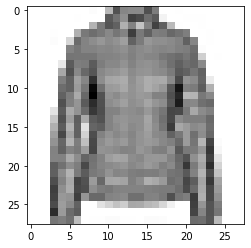

In [9]:
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28, 28))

plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar
plt.grid(False)

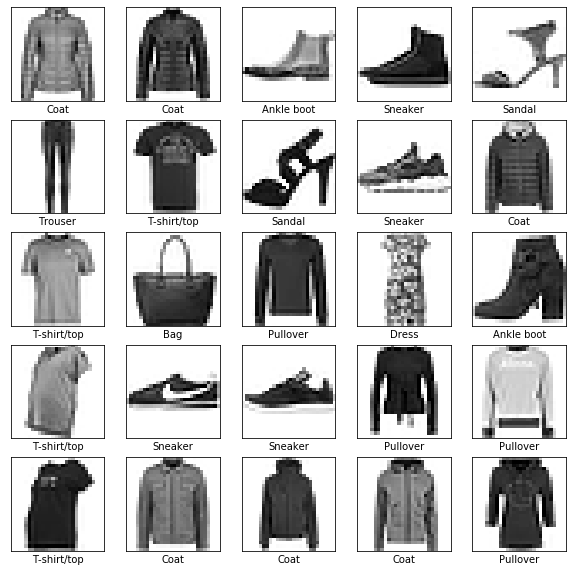

In [11]:
plt.figure(figsize=(10, 10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [13]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [15]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4988 - accuracy: 0.8243
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3820 - accuracy: 0.8624
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3342 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3139 - accuracy: 0.8840
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2935 - accuracy: 0.8918


In [16]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print("Accuracy on test dataset: ", test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.3512 - accuracy: 0.8713
Accuracy on test dataset:  0.8712999820709229


In [17]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

In [19]:
predictions.shape

(32, 10)

In [20]:
predictions[0]

array([3.47140813e-05, 2.86430259e-06, 1.71763878e-02, 3.03383075e-07,
       9.55649018e-01, 1.26466535e-08, 2.71317251e-02, 1.89320716e-07,
       4.58645400e-06, 4.65331560e-08], dtype=float32)